In [650]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [651]:
df = pd.read_excel("E:/AIMLGLIM/FINANCE_RISK_ANALYTICS/project1/Company_Data2015-2.xlsx")

In [652]:
df.head(10)

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05
5,2484,Usha Ispat,-2519.40,179.35,-2519.39,-1824.75,694.64,0.02,-1843.74,0.00,1843.74,18.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-140.47,-140.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.00,0.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0.00
6,23633,Hanung Toys,-2125.05,30.82,-1031.5

In [653]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc')

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets/Liabilities      

In [655]:
df.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets/Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj._Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG-Net_Worth_perc,ROG-Capital_Employed_perc,ROG-Gross_Block_perc,ROG-Gross_Sales_perc,ROG-Net_Sales_perc,ROG-Cost_of_Production_perc,ROG-Total_Assets_perc,ROG-PBIDT_perc,ROG-PBDT_perc,ROG-PBIT_perc,ROG-PBT_perc,ROG-PAT_perc,ROG-CP_perc,ROG-Revenue_earnings_in_forex_perc,ROG-Revenue_expenses_in_forex_perc,ROG-Market_Capitalisation_perc,Current_Ratio[Latest],Fixed_Assets_Ratio[Latest],Inventory_Ratio[Latest],Debtors_Ratio[Latest],Total_Asset_Turnover_Ratio[Latest],Interest_Cover_Ratio[Latest],PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3.582000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3.586000e+03,3.586000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3.586000e+03,3.586000e+03,3.586000e+03,3.586000e+03,3.586000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3585.000000,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,1778.453751,1123.738985,1079.702579,48.729824,1077.187292,798.544621,25.554997,248.175282,116.268795,217.659395,85.752909,61.218313,60.058963,91.734200,131.165270,256.327002,7.655689,157.237836,2.243153e+03,1664.092387,36.018709,65.770750,-60.870365,11.436453,1.237625e+03,2.988885e+03,37.554306,242.672962,242.588530,310.488405,2.793283e+03,3.758522e+02,3.363799e+02,3.747000e+02,2.240702e+02,112.231654,221.091523,37.227844,364.863221,63.682220,12.056603,51.53884,37.798946,33.026996,1.237236,16.387894,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,11437.574690,10603.703837,9996.574173,426.040665,9843.880293,9076.702982,194.244466,1949.593350,956.199566,1850.972782,799.925768,620.298432,580.432912,780.790561,1150.730209,4132.339619,111.432070,1622.664105,1.282837e+05,12805.173084,828.420796,1455.048376,701.974713,1272.257361,4.104193e+04,1.264729e+05,893.619402,6103.527897,6103.487655,5573.215095,1.259417e+05,2.327840e+04,2.035340e+04,2.246279e+04,1.965923e+04,13480.515287,13980.202791,658.666041,15233.643027,1047.928144,108.410131,681.15091,458.189394,489.563498,2.673228,351.737840,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,-4.510000,-62.590000,-62.590000,-448.720000,-119.100000,-22.650000,0.000000,-4655.140000,-5874.530000,-4812.950000,-6032.340000,-6032.340000,-4418.720000,-5874.530000,0.000000,0.000000,0.000000,-3371.570000,-3.371570e+04,0.000000,-1808.00000

In [656]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [657]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(3586, 67)


In [658]:
df.isnull().sum()

Co_Code                                  0
Co_Name                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block                              0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets/Liabilities                 0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PA

#### Transforming Target variable 'Networth_Next_Year' into 1 & 0
 

In [659]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [660]:
df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [661]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [662]:
a=df['default'].value_counts()[0]
b=df['default'].value_counts()[1]
print("Propotion of ones in total is : ", b/(b+a))

Propotion of ones in total is :  0.10819854991634133


#### Checking summary statistics of default variable

In [663]:
df['default'].describe()

count    3586.000000
mean        0.108199
std         0.310674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

In [664]:
#dropping 'Deposits_accepted_by_commercial_banks' as its completely(100%) blank
df.drop(['Co_Name'], axis=1, inplace=True)
col=list(df)



In [665]:
df.columns

Index(['Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up', 'Networth',
       'Capital_Employed', 'Total_Debt', 'Gross_Block', 'Net_Working_Capital',
       'Current_Assets', 'Current_Liabilities_and_Provisions',
       'Total_Assets/Liabilities', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT',
       'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Capital_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc',
       'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc',
       'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc',
       'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc',
       'ROG-PBIDT_perc', '

In [666]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')



In [667]:
df = pd.DataFrame(imputer.fit_transform(df))
df.columns=col
df.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets/Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj._Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG-Net_Worth_perc,ROG-Capital_Employed_perc,ROG-Gross_Block_perc,ROG-Gross_Sales_perc,ROG-Net_Sales_perc,ROG-Cost_of_Production_perc,ROG-Total_Assets_perc,ROG-PBIDT_perc,ROG-PBDT_perc,ROG-PBIT_perc,ROG-PBT_perc,ROG-PAT_perc,ROG-CP_perc,ROG-Revenue_earnings_in_forex_perc,ROG-Revenue_expenses_in_forex_perc,ROG-Market_Capitalisation_perc,Current_Ratio[Latest],Fixed_Assets_Ratio[Latest],Inventory_Ratio[Latest],Debtors_Ratio[Latest],Total_Asset_Turnover_Ratio[Latest],Interest_Cover_Ratio[Latest],PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block,default
0,16974.0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0.0,0.0,45.0,0.00,0.00,1.0
1,21214.0,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29.0,101.0,2.0,0.31,0.24,1.0
2,14852.0,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.0,558.0,0.0,-0.03,-0.26,1.0
3,2439.0,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93.0,63.0,2.0,0.24,1.90,1.0
4,23505.0,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887.0,346.0,0.0,0.01,0.05,1.0


In [668]:
df['PBITM_perc[Latest]'].describe()

count      3586.000000
mean       -109.181500
std        3057.209989
min     -141600.000000
25%           0.000000
50%           5.230000
75%          14.285000
max       19195.700000
Name: PBITM_perc[Latest], dtype: float64

#### Checking Descriptive statistics of the variable 'PBT_as_perc_of_total_income' for non defaulters

In [669]:
df.loc[df['default'] == 0,'PBITM_perc[Latest]'].describe()

count     3198.000000
mean       -60.593862
std       2003.690823
min     -88738.640000
25%          0.662500
50%          6.425000
75%         15.662500
max      19195.700000
Name: PBITM_perc[Latest], dtype: float64

#### Checking Descriptive statistics of the variable 'PBT_as_perc_of_total_income' for defaulters

In [670]:
df.loc[df['default'] == 1,'PBITM_perc[Latest]'].describe()

count       388.000000
mean       -509.653840
std        7296.295174
min     -141600.000000
25%         -33.800000
50%           0.000000
75%           0.000000
max       15080.000000
Name: PBITM_perc[Latest], dtype: float64

In [671]:
scaler = StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_copy))

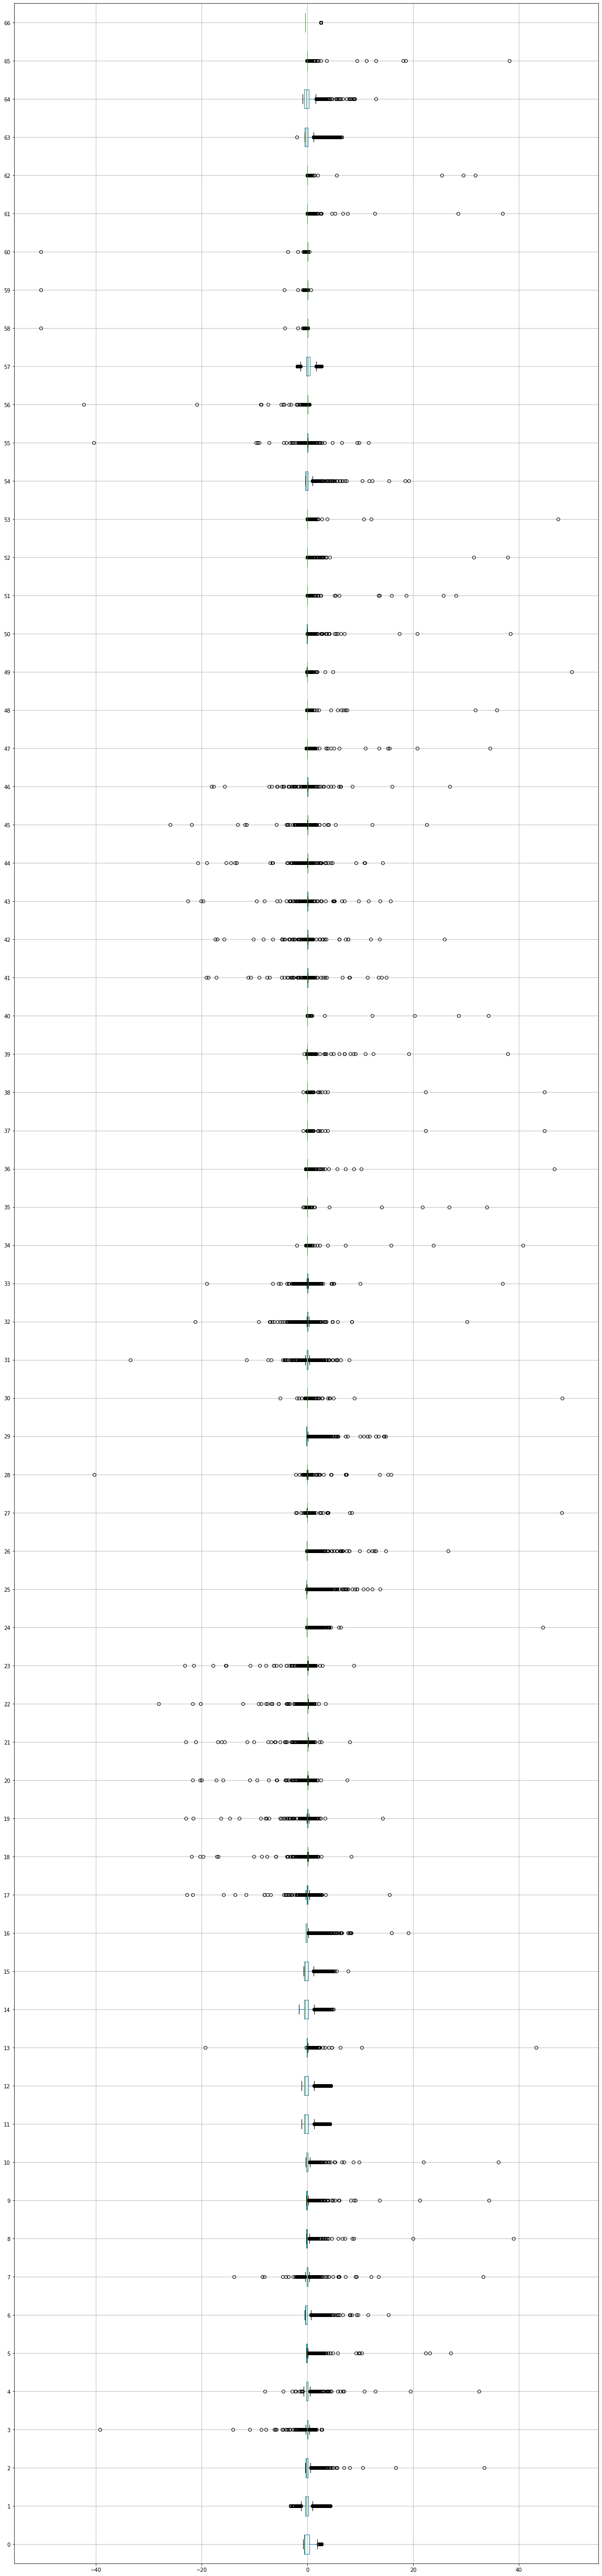

In [672]:
plt.figure(figsize=(20,90))
df_scaled.boxplot(vert=False)

In [673]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [674]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [675]:
for column in df_copy.columns:
    if df_copy[column].dtype != 'object': 
        lr,ur=remove_outlier(df_copy[column])
        df_copy[column]=np.where(df_copy[column]>ur,ur,df_copy[column])
        df_copy[column]=np.where(df_copy[column]<lr,lr,df_copy[column])

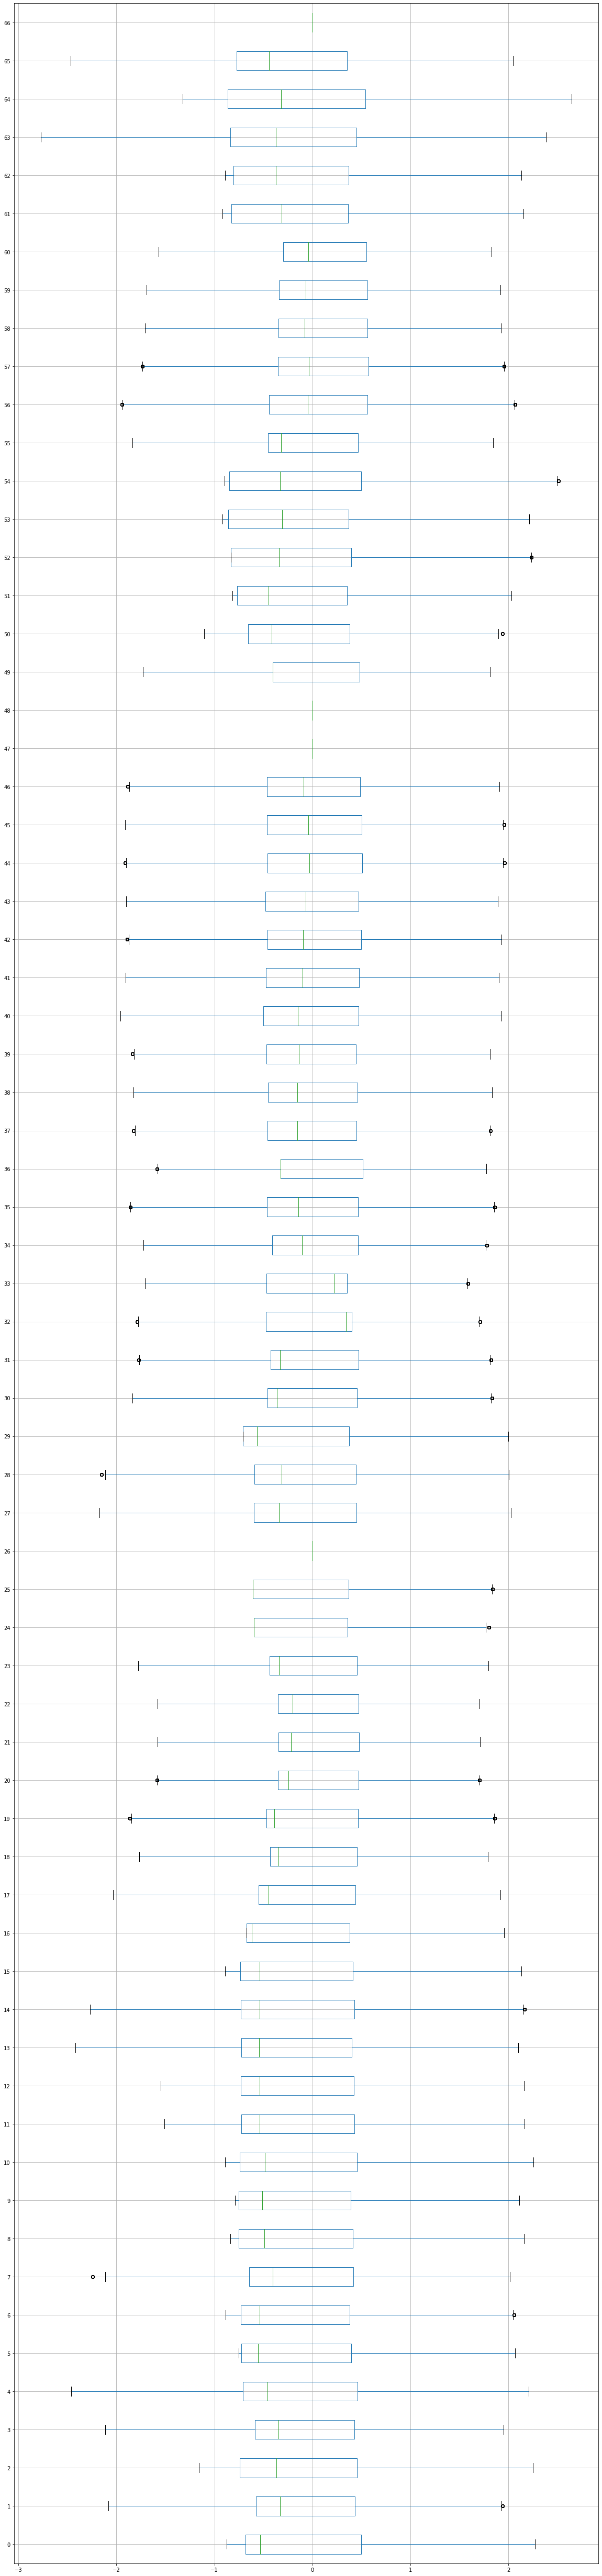

In [676]:
scaler = StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_copy))
plt.figure(figsize=(20,90))
df_scaled.boxplot(vert=False)

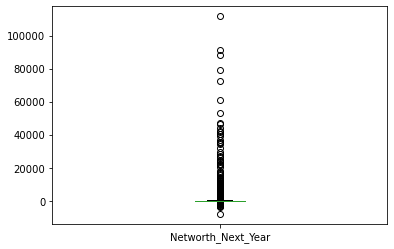

In [677]:
df['Networth_Next_Year'].plot.box()

In [678]:
check_outlier(df['Networth_Next_Year'])

(-175.74125, 303.52875000000006)

In [679]:
check_outlier(df['PBITM_perc[Latest]'])

(-21.427500000000002, 35.712500000000006)

In [680]:
check_outlier(df['Gross_Sales'])

(-359.76875, 603.4612500000001)

In [681]:
df_copy = df.copy()

In [682]:
df_copy.columns

Index(['Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up', 'Networth',
       'Capital_Employed', 'Total_Debt', 'Gross_Block', 'Net_Working_Capital',
       'Current_Assets', 'Current_Liabilities_and_Provisions',
       'Total_Assets/Liabilities', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT',
       'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Capital_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc',
       'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc',
       'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc',
       'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc',
       'ROG-PBIDT_perc', '

In [683]:
# Dropping records higher than upper whisker
df_copy.drop(df_copy[df_copy.Networth_Next_Year > 303.53].index, inplace=True)
df_copy.drop(df_copy[df_copy.Gross_Sales > 603.46].index, inplace=True)
df_copy.drop(df_copy[df_copy['PBITM_perc[Latest]'] > 35.72].index, inplace=True)

# Capping values lower than lower whisker
df_copy['Networth_Next_Year'] = np.where(df_copy['Networth_Next_Year'] <-175.75, -175.75,df_copy['Networth_Next_Year'])
df_copy['Gross_Sales'] = np.where(df_copy['Gross_Sales'] <-359.77, -359.77,df_copy['Gross_Sales'])
df_copy['PBITM_perc[Latest]'] = np.where(df_copy['PBITM_perc[Latest]'] <-21.4, -21.4,df_copy['PBITM_perc[Latest]'])

#### Visualising Total income vs Default - Without outlier removal


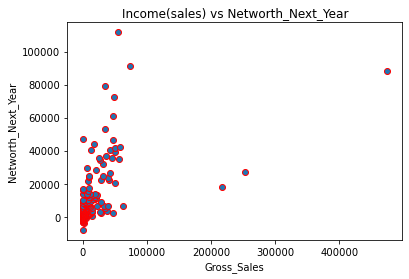

In [684]:
plt.scatter(df['Gross_Sales'], df['Networth_Next_Year'], edgecolors='r')
plt.xlabel('Gross_Sales')
plt.ylabel('Networth_Next_Year')
plt.title('Income(sales) vs Networth_Next_Year')
plt.show()

#### Visualising PBT_as_perc_of_total_income vs Default - Without outlier removal

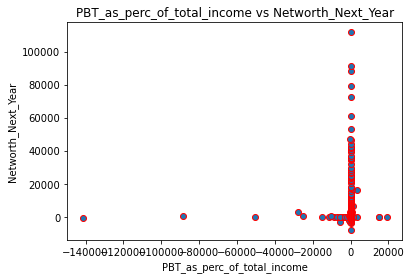

In [685]:
plt.scatter(df['PBITM_perc[Latest]'], df['Networth_Next_Year'], edgecolors='r')
plt.xlabel('PBT_as_perc_of_total_income')
plt.ylabel('Networth_Next_Year')
plt.title('PBT_as_perc_of_total_income vs Networth_Next_Year')
plt.show()

#### Visualising PBT_as_perc_of_total_income vs Default - With outlier removal

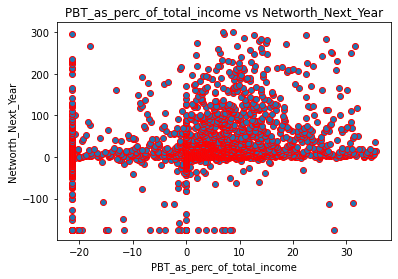

In [686]:
plt.scatter(df_copy['PBITM_perc[Latest]'], df_copy['Networth_Next_Year'], edgecolors='r')
plt.xlabel('PBT_as_perc_of_total_income')
plt.ylabel('Networth_Next_Year')
plt.title('PBT_as_perc_of_total_income vs Networth_Next_Year')
plt.show()

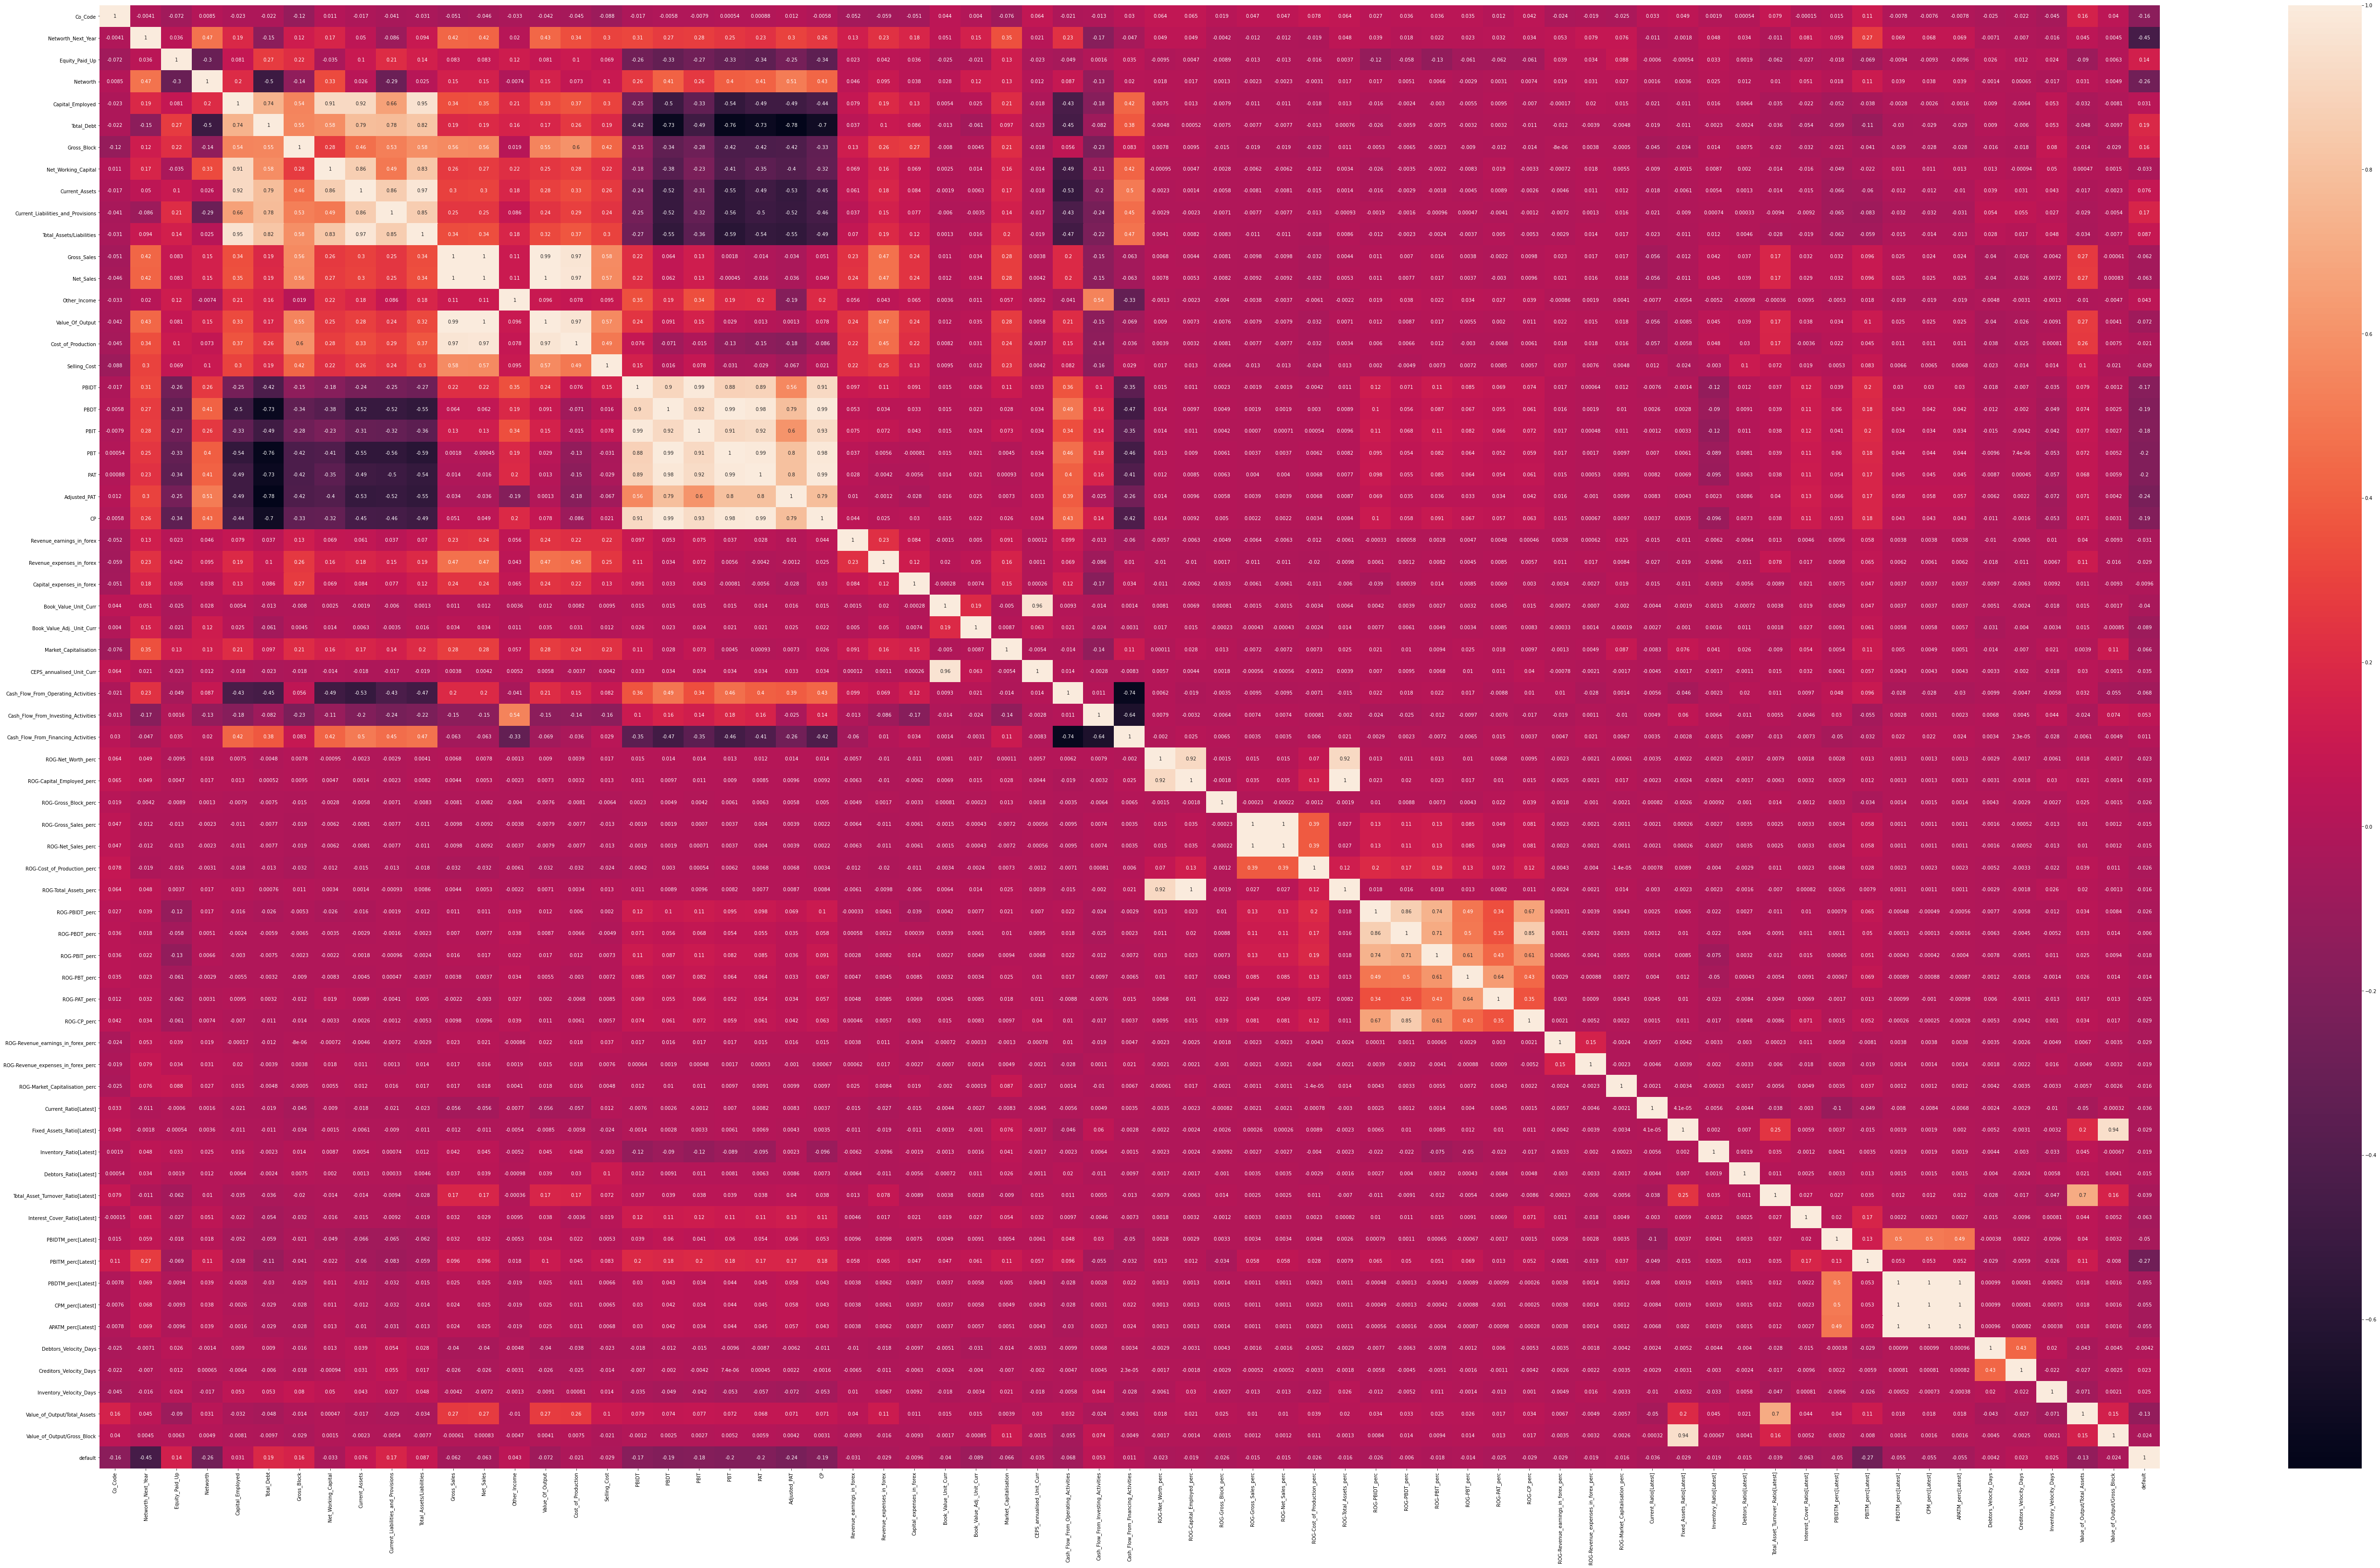

In [687]:
%matplotlib inline 
plt.figure(figsize=(96,56))
sns.heatmap(df_copy.iloc[:].corr(),annot=True)

In [688]:
x=(df_copy.iloc[:].corr()>0.98)

In [689]:
print(x)

                                     Co_Code  Networth_Next_Year  \
Co_Code                                 True               False   
Networth_Next_Year                     False                True   
Equity_Paid_Up                         False               False   
Networth                               False               False   
Capital_Employed                       False               False   
Total_Debt                             False               False   
Gross_Block                            False               False   
Net_Working_Capital                    False               False   
Current_Assets                         False               False   
Current_Liabilities_and_Provisions     False               False   
Total_Assets/Liabilities               False               False   
Gross_Sales                            False               False   
Net_Sales                              False               False   
Other_Income                           False    

In [690]:
type(x)

pandas.core.frame.DataFrame

In [691]:
s = x.stack()
corel=s[s].index.tolist()

In [692]:
for i in corel:
    if i[0]!=i[1]:
        print(i)

('Gross_Sales', 'Net_Sales')
('Gross_Sales', 'Value_Of_Output')
('Net_Sales', 'Gross_Sales')
('Net_Sales', 'Value_Of_Output')
('Value_Of_Output', 'Gross_Sales')
('Value_Of_Output', 'Net_Sales')
('PBIDT', 'PBIT')
('PBDT', 'PBT')
('PBDT', 'PAT')
('PBDT', 'CP')
('PBIT', 'PBIDT')
('PBT', 'PBDT')
('PBT', 'PAT')
('PBT', 'CP')
('PAT', 'PBDT')
('PAT', 'PBT')
('PAT', 'CP')
('CP', 'PBDT')
('CP', 'PBT')
('CP', 'PAT')
('ROG-Capital_Employed_perc', 'ROG-Total_Assets_perc')
('ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc')
('ROG-Net_Sales_perc', 'ROG-Gross_Sales_perc')
('ROG-Total_Assets_perc', 'ROG-Capital_Employed_perc')
('PBDTM_perc[Latest]', 'CPM_perc[Latest]')
('PBDTM_perc[Latest]', 'APATM_perc[Latest]')
('CPM_perc[Latest]', 'PBDTM_perc[Latest]')
('CPM_perc[Latest]', 'APATM_perc[Latest]')
('APATM_perc[Latest]', 'PBDTM_perc[Latest]')
('APATM_perc[Latest]', 'CPM_perc[Latest]')


In [693]:
# Copy all the predictor variables into X dataframe
X = df_copy.drop('default', axis=1)

# Copy target into the y dataframe. 
y = df_copy[['default']]

In [694]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)

In [695]:
logreg = LogisticRegression(solver='newton-cg',max_iter=5000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=5000, solver='newton-cg')

### DETERMINING FEATURE IMPORTANCE 

In [696]:
lista=len(list(list(logreg.coef_)[0])*np.std(X, 0))

In [697]:
listb=len(X.columns)

In [698]:
newdf = pd.DataFrame(list(zip(X.columns, list(list(logreg.coef_)[0]))), 
               columns =['Feature', 'Importance'])

In [699]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [758]:
newdf['Importance']=newdf['Importance'].abs()

In [760]:
newdf.sort_values(by='Importance', ascending=False).head(60)


,Feature,Importance
1,Networth_Next_Year,3.318058
64,Value_of_Output/Total_Assets,0.533430
13,Other_Income,0.298332
53,Debtors_Ratio[Latest],0.275263
22,Adjusted_PAT,0.232193
19,PBIT,0.215308
27,Book_Value_Unit_Curr,0.157743
38,ROG-Net_Sales_perc,0.156488
37,ROG-Gross_Sales_perc,0.156360
30,CEPS_annualised_Unit_Curr,0.149717


In [761]:
X=df_copy[['Networth_Next_Year','Value_of_Output/Total_Assets',
'Other_Income',
'Debtors_Ratio[Latest]',
'Adjusted_PAT',
'PBIT',
'Book_Value_Unit_Curr',
'ROG-Net_Sales_perc',
'ROG-Gross_Sales_perc',
'CEPS_annualised_Unit_Curr',
'Net_Sales',
'Cash_Flow_From_Financing_Activities',
'PBDT',
'Total_Asset_Turnover_Ratio[Latest]',
'PAT',
'Networth',
'CP',
'Cash_Flow_From_Operating_Activities',
'Revenue_earnings_in_forex',
'Gross_Sales']]
# Copy target into the y dataframe. 
y = df_copy[['default']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)
logreg = LogisticRegression(solver='newton-cg',max_iter=5000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=5000, solver='newton-cg')

In [762]:
ytrain_predict = logreg.predict(X_train)
ytest_predict = logreg.predict(X_test)

In [763]:
ytest_predict_prob=logreg.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,7.197298e-193
1,1.0,4.746174e-111
2,1.0,2.182019e-18
3,1.0,1.983952e-61
4,1.0,8.561696e-08


In [764]:
# Accuracy - Training Data
logreg.score(X_train, y_train)

0.9959325973271353

AUC: 1.000


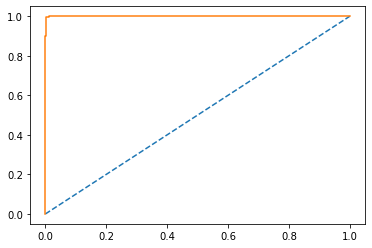

In [765]:
# predict probabilities
probs = logreg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
logreg_train_fpr, logreg_train_tpr, logreg_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_train_fpr, logreg_train_tpr)

In [766]:
logreg_train_acc=logreg.score(X_train, y_train) 
logreg_train_acc

0.9959325973271353

In [767]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1489
         1.0       0.99      0.98      0.98       232

    accuracy                           1.00      1721
   macro avg       0.99      0.99      0.99      1721
weighted avg       1.00      1.00      1.00      1721



In [768]:
logreg_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
logreg_df=pd.DataFrame(logreg_metrics).transpose()

logreg_df

,precision,recall,f1-score,support
0.0,0.996649,0.998657,0.997652,1489.000000
1.0,0.991266,0.978448,0.984816,232.000000
accuracy,0.995933,0.995933,0.995933,0.995933
macro avg,0.993958,0.988553,0.991234,1721.000000
weighted avg,0.995923,0.995933,0.995921,1721.000000


In [769]:
logreg_train_recall=round(logreg_df.loc["1.0"][1],2)
logreg_train_f1=round(logreg_df.loc["1.0"][2],2)
logreg_train_precision=round(logreg_df.loc["1.0"][0],2)
print ('logreg_train_precision ',logreg_train_precision)
print ('logreg_train_recall ',logreg_train_recall)
print ('logreg_train_f1 ',logreg_train_f1)
print('AUC: %.3f' % logreg_train_auc)
print('Train Accuracy :%.3f'% logreg_train_acc)

logreg_train_precision  0.99
logreg_train_recall  0.98
logreg_train_f1  0.98
AUC: 1.000
Train Accuracy :0.996


AUC: 0.995


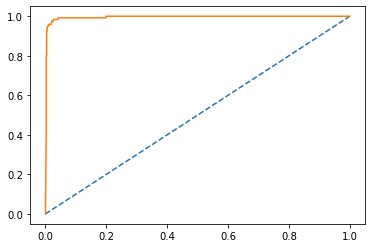

In [770]:
# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
logreg_test_fpr, logreg_test_tpr, logreg_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_test_fpr, logreg_test_tpr)

In [771]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[724,   4],
       [  9, 112]], dtype=int64)

In [772]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       728
         1.0       0.97      0.93      0.95       121

    accuracy                           0.98       849
   macro avg       0.98      0.96      0.97       849
weighted avg       0.98      0.98      0.98       849



In [773]:
#Test Data Accuracy
logreg_test_acc=logreg.score(X_test,y_test)
logreg_test_acc

0.9846878680800942

In [774]:
logreg_metrics=classification_report(y_test, ytest_predict,output_dict=True)
logreg_df=pd.DataFrame(logreg_metrics).transpose()
logreg_test_recall=round(logreg_df.loc["1.0"][1],2)
logreg_test_f1=round(logreg_df.loc["1.0"][2],2)
logreg_test_precision=round(logreg_df.loc["1.0"][0],2)
print ('logreg_test_precision ',logreg_test_precision)
print ('logreg_test_recall ',logreg_test_recall)
print ('logreg_test_f1 ',logreg_test_f1)
print('AUC: %.3f' % logreg_test_auc)
print('Test Accuracy :%.3f'% logreg_test_acc)

logreg_test_precision  0.97
logreg_test_recall  0.93
logreg_test_f1  0.95
AUC: 0.995
Test Accuracy :0.985


## RANDOM FOREST CLASSIFIER

In [775]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [776]:
rfcl = RandomForestClassifier()
param_grid = {
    'max_depth': [15,20,25],
    'max_features': [3,6,9],
    'min_samples_leaf': [5,7,9],
    'min_samples_split': [30,50,80],
    'n_estimators': [100]
}


In [777]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train.values.ravel())
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
rf_train_acc=best_grid.score(X_train,y_train.values.ravel()) 
rf_train_acc

In [ ]:
confusion_matrix(y_train.values.ravel(),ytrain_predict)

In [ ]:
print(classification_report(y_train.values.ravel(),ytrain_predict))

In [ ]:
rf_metrics=classification_report(y_train.values.ravel(), ytrain_predict,output_dict=True)
rand_df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(rand_df.loc["1.0"][0],2)
rf_train_recall=round(rand_df.loc["1.0"][1],2)
rf_train_f1=round(rand_df.loc["1.0"][2
                                    
                                    ],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

In [ ]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train.values.ravel(),best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train.values.ravel(),best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [ ]:
# Accuracy - Train Data
lda_train_acc=lda.score(X_train, y_train)
lda_train_acc

In [ ]:
confusion_matrix(y_test.values.ravel(),ytest_predict)

In [ ]:
rf_test_acc=best_grid.score(X_test,y_test.values.ravel())
rf_test_acc

In [ ]:
print(classification_report(y_test.values.ravel(),ytest_predict))

In [ ]:
rf_metrics=classification_report(y_test.values.ravel(), ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1.0"][0],2)
rf_test_recall=round(df.loc["1.0"][1],2)
rf_test_f1=round(df.loc["1.0"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

In [ ]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test.values.ravel(),best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test.values.ravel(),best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [ ]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

In [ ]:
# LDA LINEAR DISCRIMINANT ANALYSIS

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

In [ ]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

In [ ]:
ytest_predict_prob=lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

In [ ]:
# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr,lda_train_tpr,lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [ ]:
# Accuracy - Train Data
lda_train_acc=lda.score(X_train, y_train)
lda_train_acc

In [ ]:
print(classification_report(y_train, ytrain_predict))

In [ ]:
confusion_matrix(y_train, ytrain_predict)

In [ ]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
lda_df=pd.DataFrame(lda_metrics).transpose()
lda_train_recall=round(lda_df.loc["1.0"][1],2)
lda_train_f1=round(lda_df.loc["1.0"][2],2)
lda_train_precision=round(lda_df.loc["1.0"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
print('LDA TRAIN AUC: %.3f' % lda_train_auc)
print('LDA Train Accuracy :%.3f'% lda_train_acc)

In [ ]:
#### AUC and ROC for the test data


In [ ]:
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [ ]:
# Accuracy - Test Data
lda_test_acc=lda.score(X_test, y_test)
lda_test_acc

In [ ]:
print(classification_report(y_test, ytest_predict))

In [ ]:
confusion_matrix(y_test, ytest_predict)

In [ ]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lda_df=pd.DataFrame(lda_metrics).transpose()
lda_test_recall=round(lda_df.loc["1.0"][1],2)
lda_test_f1=round(lda_df.loc["1.0"][2],2)
lda_test_precision=round(lda_df.loc["1.0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)
print('LDA TEST AUC: %.3f' % lda_test_auc)
print('LDA Test Accuracy :%.3f'% lda_test_acc)

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LOGIT Train':[logreg_train_acc,logreg_train_auc,logreg_train_recall,logreg_train_precision,logreg_train_f1],
        'LOGIT Test':[logreg_test_acc,logreg_test_auc,logreg_test_recall,logreg_test_precision,logreg_test_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)